Template:  dict_keys(['O5', 'O9', 'A0', 'A2', 'A3', 'A5', 'A7', 'B0', 'B1', 'B3', 'B8', 'B9', 'F0', 'F2', 'F5', 'F6', 'F8', 'G0', 'G2', 'G5', 'G8', 'K0', 'K2', 'K3', 'K4', 'K5', 'K7', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'rF6', 'rF8', 'rG0', 'rG5', 'wF5', 'wF8', 'wG0', 'wG5'])


Objek:  dict_keys(['51Aql', 'Albali', 'HD214923', 'HD215648', '10 Lac', 'HD212698', 'HIP20900', 'HIP114046'])
Masukkan Template = A0
Masukkan Objek = Albali


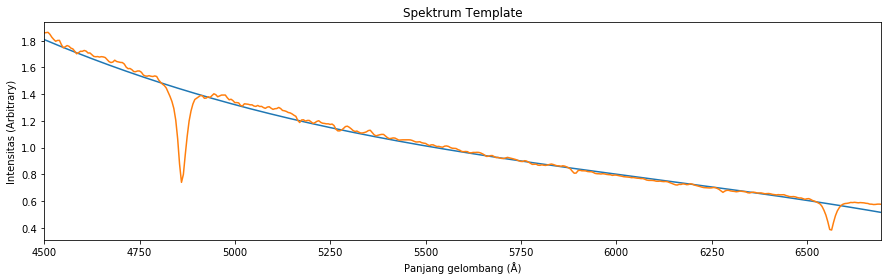

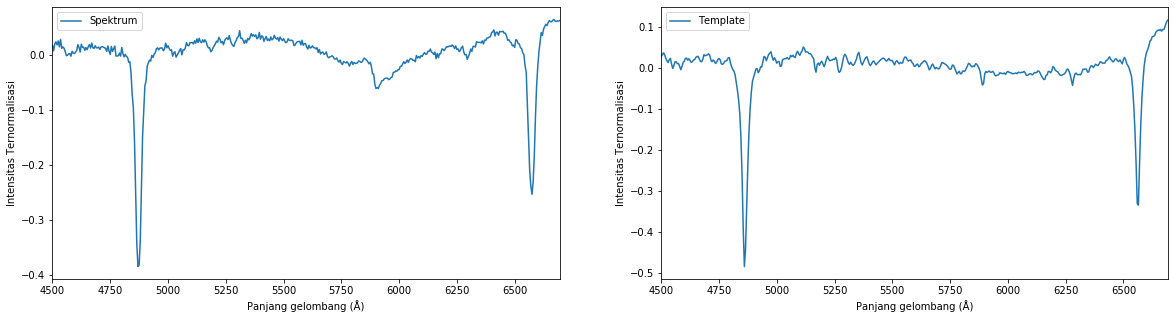

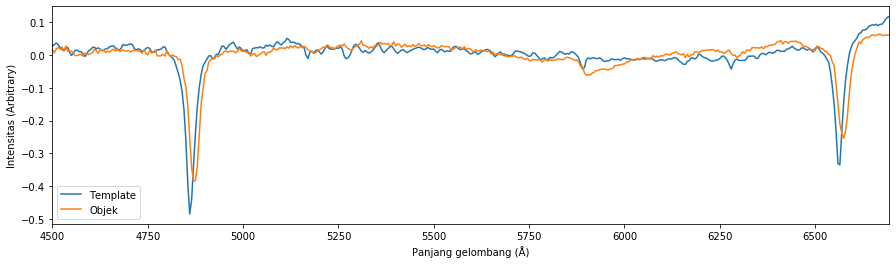

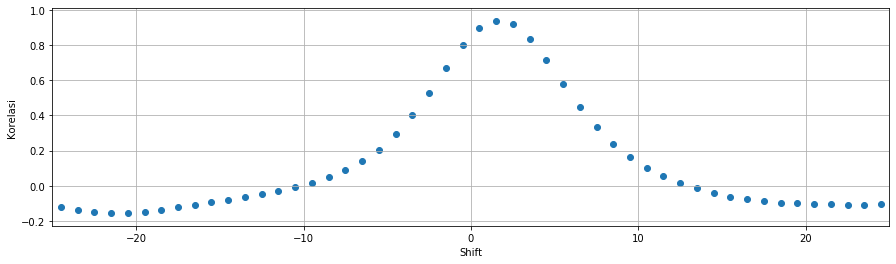

min = -5
max = 7


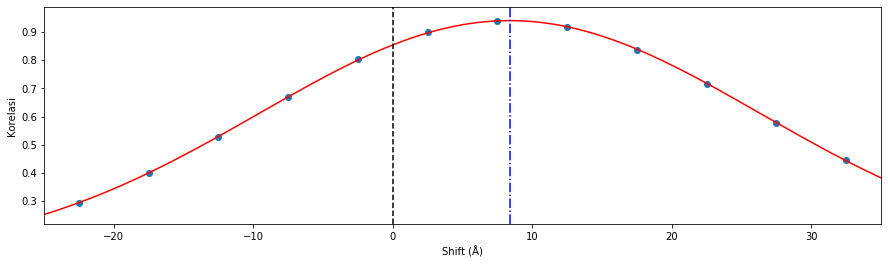

Max =  0.9408071491702774
Shift = 8.371854 Angstrom
V = 448.38 ± 962.04 km/s
sigma = 3.592516 Angstrom


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from specutils.fitting import fit_generic_continuum
from specutils.spectra import Spectrum1D, SpectralRegion
from astropy import units as u
import scipy.signal
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

temp = {
  "O5": "uko5v.dat",
  "O9": "uko9v.dat",
  "A0": "uka0v.dat",
  "A2": "uka2v.dat",
  "A3": "uka3v.dat",
  "A5": "uka5v.dat",
  "A7": "uka7v.dat",
  "B0": "ukb0v.dat",
  "B1": "ukb1v.dat",
  "B3": "ukb3v.dat",
  "B8": "ukb8v.dat",
  "B9": "ukb9v.dat",
  "F0": "ukf0v.dat",
  "F2": "ukf2v.dat",
  "F5": "ukf5v.dat",
  "F6": "ukf6v.dat",
  "F8": "ukf8v.dat",
  "G0": "ukg0v.dat",    
  "G2": "ukg2v.dat",
  "G5": "ukg5v.dat",
  "G8": "ukg8v.dat",
  "K0": "ukk0v.dat",
  "K2": "ukk2v.dat",
  "K3": "ukk3v.dat",
  "K4": "ukk4v.dat",
  "K5": "ukk5v.dat",
  "K7": "ukk7v.dat",
  "M1": "ukm1v.dat",
  "M2": "ukm2v.dat",
  "M3": "ukm3v.dat",
  "M4": "ukm4v.dat",
  "M5": "ukm5v.dat",
  "M6": "ukm6v.dat",
  "rF6": "ukrf6v.dat",
  "rF8": "ukrf8v.dat",
  "rG0": "ukrg0v.dat",
  "rG5": "ukrg5v.dat",
  "wF5": "ukwf5v.dat",
  "wF8": "ukwf8v.dat",
  "wG0": "uka3v.dat",
  "wG5": "uka3v.dat",
}
asci = {
  "51Aql": "ascii3",
  "Albali": "ascii4",
  "HD214923": "ascii5",
  "HD215648": "ascii6",
  "10 Lac": "ascii7",
  "HD212698": "ascii10",
  "HIP20900": "ascii11",
  "HIP114046": "ascii12",
}
def normal(x, A = 1, mu=0, sigma=1, const=0):
    y = A*np.exp(-(x-mu)**2/2/sigma**2)+const
    return y
################# Pengambilan data ##############
print('Template: ', temp.keys())
print('\n')
print('Objek: ', asci.keys())

t = input('Masukkan Template = ')
s = input('Masukkan Objek = ')
template = temp[t]
spektrum = asci[s]

xt = np.loadtxt(template, usecols=0)
yt = np.loadtxt(template, usecols=1)

xs = np.loadtxt(spektrum, usecols=0)
ys = np.loadtxt(spektrum, usecols=1)

mins = 4500
maxs = 6700
fs = interp1d(xs, ys, kind='cubic')
############## pre-proc ####################

x = []
y = []

jalan = 0
while(xt[jalan] < mins):
    jalan += 1
while (xt[jalan] < maxs):
    x.append(xt[jalan])
    y.append(yt[jalan])
    jalan += 1

xt = x
yt = y
    
x = []
y = []

jalan = 0
while(xs[jalan] < mins):
    jalan += 1
while (xs[jalan] < maxs):
    x.append(xs[jalan])
    y.append(ys[jalan])
    jalan += 1
xs = x
ys = y

########### Membuat kontinum template #############
spectrum = Spectrum1D(flux=yt*u.Jy, spectral_axis=xt*u.um)
g1_fit = fit_generic_continuum(spectrum)
yc = g1_fit(xt*u.um)

plt.figure(figsize=(15,4))
plt.plot(xt,yc)
plt.plot(xt,yt)
plt.xlim(xt[0],xt[-1])
plt.xlabel('Panjang gelombang (Å)')
plt.ylabel('Intensitas (Arbitrary)')
plt.title('Spektrum Template')
plt.show()

yt = yt/yc
xs = xt 
ys = fs(xt)

ys = ys -np.mean(ys)
yt = yt -np.mean(yt)
########## Korelasi ##################
corr = scipy.signal.correlate(ys,yt, mode='same')/(np.std(ys)*len(ys)*np.std(yt*u.Jy))
x = np.arange(len(corr))-(len(corr)+1)/2
fc = interp1d(x,corr, kind='cubic')
########### Plot #######################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(xs,ys,label='Spektrum')
ax1.legend(loc='best')
ax1.set_xlabel('Panjang gelombang (Å)')
ax1.set_ylabel('Intensitas Ternormalisasi')
ax1.set_xlim(xs[0],xs[-1])
ax2.plot(xt,yt,label='Template')
ax2.legend(loc='best')
ax2.set_xlabel('Panjang gelombang (Å)')
ax2.set_ylabel('Intensitas Ternormalisasi')
ax2.set_xlim(xt[0],xt[-1])
plt.show()

plt.figure(figsize=(15,4))
plt.plot(xt,yt, label='Template')
plt.plot(xs,ys,label='Objek')
plt.legend(loc='best')
plt.xlim(xt[0],xt[-1])
plt.xlabel('Panjang gelombang (Å)')
plt.ylabel('Intensitas (Arbitrary)')
plt.show()

############### Korelasinya ############
plt.figure(figsize=(15,4))
plt.scatter(x,corr)
plt.xlim(-25,25)
plt.grid(which='both')
plt.xlabel('Shift')
plt.ylabel('Korelasi')
plt.show()
##############################################
minf = float(input('min = '))
maxf = float(input('max = '))
############ Pre-proc #####
xf = []
yf = []

jalan = 0
while(x[jalan] < minf):
    jalan += 1
while (x[jalan] < maxf):
    xf.append(x[jalan])
    yf.append(corr[jalan])
    jalan += 1
############ Fitting ##########
X = np.linspace(minf,maxf,1000)
popt, pcov = curve_fit(normal, xf, yf)
Y = normal(X, popt[0], popt[1],popt[2],popt[3]) 

########### Plot ##############    
plt.figure(figsize=(15,4))
lima = np.ones(len(xf))*5
xf = xf*lima
Xmed = np.median(xs)
V = 299_792.458*(popt[1]*5)/Xmed
sigma = 299_792.458*(popt[2]*5)/Xmed
plt.scatter(xf,yf)
plt.plot(X*5,Y,'r')
plt.axvline(x=0,ls='--',c= 'k')
plt.axvline(x=(popt[1]*5),ls='-.',c= 'b')
plt.xlim(minf*5,maxf*5)
plt.xlabel('Shift (Å)')
plt.ylabel('Korelasi')
plt.show()
print('Max = ',popt[0]+popt[3])
print('Shift = %f Angstrom'%(popt[1]*5))
print(f'V = {round(V,2)} ± {round(sigma,2)} km/s')
print('sigma = %f Angstrom'%popt[2])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from specutils.fitting import fit_generic_continuum
from specutils.spectra import Spectrum1D, SpectralRegion
from astropy import units as u
import scipy.signal
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

def normal(x, A = 1, mu=0, sigma=1, const=0):
    y = A*np.exp(-(x-mu)**2/2/sigma**2)+const
    return y
########## Kamus ####################################
temp = {
  "O5": "uko5v.dat",
  "O9": "uko9v.dat",
  "A0": "uka0v.dat",
  "A2": "uka2v.dat",
  "A3": "uka3v.dat",
  "A5": "uka5v.dat",
  "A7": "uka7v.dat",
  "B0": "ukb0v.dat",
  "B1": "ukb1v.dat",
  "B3": "ukb3v.dat",
  "B8": "ukb8v.dat",
  "B9": "ukb9v.dat",
  "F0": "ukf0v.dat",
  "F2": "ukf2v.dat",
  "F5": "ukf5v.dat",
  "F6": "ukf6v.dat",
  "F8": "ukf8v.dat",
  "G0": "ukg0v.dat",    
  "G2": "ukg2v.dat",
  "G5": "ukg5v.dat",
  "G8": "ukg8v.dat",
  "K0": "ukk0v.dat",
  "K2": "ukk2v.dat",
  "K3": "ukk3v.dat",
  "K4": "ukk4v.dat",
  "K5": "ukk5v.dat",
  "K7": "ukk7v.dat",
  "M1": "ukm1v.dat",
  "M2": "ukm2v.dat",
  "M3": "ukm3v.dat",
  "M4": "ukm4v.dat",
  "M5": "ukm5v.dat",
  "M6": "ukm6v.dat",
  "rF6": "ukrf6v.dat",
  "rF8": "ukrf8v.dat",
  "rG0": "ukrg0v.dat",
  "rG5": "ukrg5v.dat",
  "wF5": "ukwf5v.dat",
  "wF8": "ukwf8v.dat",
  "wG0": "uka3v.dat",
  "wG5": "uka3v.dat",
}
asci = {
  "51Aql": "ascii3",
  "Albali": "ascii4",
  "HD214923": "ascii5",
  "HD215648": "ascii6",
  "10 Lac": "ascii7",
  "HD212698": "ascii10",
  "HIP20900": "ascii11",
  "HIP114046": "ascii12",
}
################# Pengambilan data ##############

tulis = open('Hasil.txt','w')

for asc in asci:
    print(asc)
    spektrum = asci[asc]
    tulis.write(str(asc)+'\n')
    for indeks in temp:
        try:
            template = temp[indeks]
            xt = np.loadtxt(template, usecols=0)
            yt = np.loadtxt(template, usecols=1)


            xs = np.loadtxt(spektrum, usecols=0)
            ys = np.loadtxt(spektrum, usecols=1)


            mins = 4500
            maxs = 6700
            fs = interp1d(xs, ys, kind='cubic')
            ############## pre-proc ####################

            x = []
            y = []

            jalan = 0
            while(xt[jalan] < mins):
                jalan += 1
            while (xt[jalan] < maxs):
                x.append(xt[jalan])
                y.append(yt[jalan])
                jalan += 1

            xt = x
            yt = y

            x = []
            y = []

            jalan = 0
            while(xs[jalan] < mins):
                jalan += 1
            while (xs[jalan] < maxs):
                x.append(xs[jalan])
                y.append(ys[jalan])
                jalan += 1
            xs = x
            ys = y

            ########### Membuat kontinum template #############
            spectrum = Spectrum1D(flux=yt*u.Jy, spectral_axis=xt*u.um)
            g1_fit = fit_generic_continuum(spectrum)
            yc = g1_fit(xt*u.um)

            yt = yt/yc
            xs = xt
            ys = fs(xt)

            ys = ys -np.mean(ys)
            yt = yt -np.mean(yt)
            ########## Korelasi ##################
            corr = scipy.signal.correlate(ys,yt, mode='same')/(np.std(ys)*len(ys)*np.std(yt*u.Jy))
            x = np.arange(len(corr))-(len(corr)+1)/2
            fc = interp1d(x,corr, kind='cubic')

            ##############################################
            minf = -10
            maxf = 10
            ############ Pre-proc #####
            xf = []
            yf = []

            jalan = 0
            while(x[jalan] < minf):
                jalan += 1
            while (x[jalan] < maxf):
                xf.append(x[jalan])
                yf.append(corr[jalan])
                jalan += 1
            ############ Fitting ##########
            X = np.linspace(minf,maxf,1000)
            
            popt, pcov = curve_fit(normal, xf, yf)

            Y = normal(X, popt[0], popt[1],popt[2],popt[3]) 


            tulis.write(str(indeks)+' '+str(popt[0]+popt[3])+' '+str(popt[1])+' '+str(popt[2])+'\n')
        except RuntimeError:
            print('error di '+indeks)
print('udah')
tulis.close()